In [1]:
import sys
%matplotlib inline
sys.path.append("/usr/gapps/spot/dev/hatchet-venv/x86_64/lib/python3.9/site-packages/") # <-- Python packages
sys.path.append("/usr/gapps/spot/dev/hatchet/x86_64/") # <-- Hatchet
sys.path.append("/g/g91/nansamba1/thicket/") # <-- Thicket

from glob import glob

import pandas as pd

import thicket as th
import hatchet as ht

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

In [62]:
ht
th
th.__version__

'2024.2.1'

# Read in Data

In [40]:
import glob
#Read in Kripke data
kripke_files = "/usr/workspace/nansamba1/workspace_grace_ruby_10_4_24/kripke/openmp/LLNL-Ruby-icelake-OmniPath/workspace/experiments/kripke/kripke"
kripke_cali_files = glob.glob(f"{kripke_files}/**/*.cali", recursive=True)
kripke_strong_scaling = [file for file in kripke_cali_files if 'strong' in file]
kripke_weak_scaling = [file for file in kripke_cali_files if 'weak' in file]
tk_kripke = th.Thicket.from_caliperreader(kripke_strong_scaling, string_attributes="loop")
tk_kripke_weak = th.Thicket.from_caliperreader(kripke_weak_scaling, string_attributes="loop")

#Read in amg2023
amg2023_files = "/usr/workspace/nansamba1/workspace_grace_ruby_10-31-24_grid/amg2023/openmp/LLNL-Ruby-icelake-OmniPath/workspace/experiments/amg2023/problem1"
amg2023_files = glob.glob(f"{amg2023_files}/**/*.cali", recursive=True)
amg2023_strong_scaling = [file for file in amg2023_files if 'strong' in file]
amg2023_weak_scaling = [file for file in amg2023_files if 'weak' in file]
#amg2023_weak_s_scaling = [file for file in amg2023_files if 'weak_s' in file]

#amg2023_strong_scaling_120 = [file for file in amg2023_strong_scaling if '120' in file]
#amg2023_strong_scaling_160 = [file for file in amg2023_strong_scaling if '160' in file]
#amg2023_strong_scaling_200 = [file for file in amg2023_strong_scaling if '200' in file]

tk_amg2023 = th.Thicket.from_caliperreader(amg2023_strong_scaling, string_attributes="loop", fill_perfdata=False)
#tk_amg2023 = th.Thicket.from_caliperreader(amg2023_strong_scaling_120, string_attributes="loop", fill_perfdata=False)
tk_amg2023_weak = th.Thicket.from_caliperreader(amg2023_weak_scaling, string_attributes="loop", fill_perfdata=False)
#tk_amg2023_weak_s = th.Thicket.from_caliperreader(amg2023_weak_s_scaling, string_attributes="loop", fill_perfdata=False)

(2/2) Creating Thicket: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


In [39]:
tk_amg2023_weak.metadata.head()

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,opts:comm.stats,opts:node.order,opts:output,opts:profile.mpi,opts:region.count,opts:time.exclusive,adiakversion,user,uid,launchdate,launchday,executable,executablepath,working_directory,libraries,cmdline,hostname,cluster,jobsize,numhosts,hostlist,mpi_version,mpi_library_vendor,mpi_library_version,compiler,compiler version,Size-x,Size-y,Size-z,Px,Py,Pz,Problem,Solver,Setup-FOM,Solve-FOM,Final-FOM
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
125475836,2.12.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"profile.mpi,comm.stats,node.order,region.count...",regionprofile,spot,true,true,/usr/workspace/nansamba1/workspace_grace_ruby_...,true,true,true,0.4.0,nansamba1,"Grace Nansamba, +19254229988",1730415984,1730332800,amg,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,"[linux-vdso.so.1, /usr/WS2/nansamba1/workspace...",[/usr/workspace/nansamba1/workspace_grace_ruby...,ruby1496,ruby,32,1,[ruby1496],3.1,MVAPICH2,2.3.7,GNU,12.1.1,60,60,60,4,4,2,1,GMRES,434405000.0,333424000.0,188637000.0
350451251,2.12.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"profile.mpi,comm.stats,node.order,region.count...",regionprofile,spot,true,true,/usr/workspace/nansamba1/workspace_grace_ruby_...,true,true,true,0.4.0,nansamba1,"Grace Nansamba, +19254229988",1730415989,1730332800,amg,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,"[linux-vdso.so.1, /usr/WS2/nansamba1/workspace...",[/usr/workspace/nansamba1/workspace_grace_ruby...,ruby650,ruby,32,1,[ruby650],3.1,MVAPICH2,2.3.7,GNU,12.1.1,40,40,40,4,4,2,1,GMRES,400016000.0,333816000.0,181965000.0
1202973737,2.12.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"profile.mpi,comm.stats,node.order,region.count...",regionprofile,spot,true,true,/usr/workspace/nansamba1/workspace_grace_ruby_...,true,true,true,0.4.0,nansamba1,"Grace Nansamba, +19254229988",1730415953,1730332800,amg,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,"[linux-vdso.so.1, /usr/WS2/nansamba1/workspace...",[/usr/workspace/nansamba1/workspace_grace_ruby...,ruby1413,ruby,8,1,[ruby1413],3.1,MVAPICH2,2.3.7,GNU,12.1.1,60,60,60,2,2,2,1,GMRES,144161000.0,118671000.0,65090100.0
1536358609,2.12.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"profile.mpi,comm.stats,node.order,region.count...",regionprofile,spot,true,true,/usr/workspace/nansamba1/workspace_grace_ruby_...,true,true,true,0.4.0,nansamba1,"Grace Nansamba, +19254229988",1730415986,1730332800,amg,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,"[linux-vdso.so.1, /usr/WS2/nansamba1/workspace...",[/usr/workspace/nansamba1/workspace_grace_ruby...,ruby159,ruby,64,2,"[ruby159, ruby644]",3.1,MVAPICH2,2.3.7,GNU,12.1.1,40,40,40,4,4,4,1,GMRES,698560000.0,634141000.0,332397000.0
1620022665,2.12.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"profile.mpi,comm.stats,node.order,region.count...",regionprofile,spot,true,true,/usr/workspace/nansamba1/workspace_grace_ruby_...,true,true,true,0.4.0,nansamba1,"Grace Nansamba, +19254229988",1730415955,1730332800,amg,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,/usr/WS2/nansamba1/workspace_grace_ruby_10-31-...,"[linux-vdso.so.1, /usr/WS2/nansamba1/workspace...",[/usr/workspace/nansamba1/workspace_grace_ruby...,ruby1315,ruby,16,1,[ruby1315],3.1,MVAPICH2,2.3.7,GNU,12.1.1,60,60,60,4,2,2,1,GMRES,261152000.0,225244000.0,120936000.0


# calculation for loops

In [41]:
#average calls/rank - 1 = total loops
#max time per rank / calls/rank = avg time per iteration 
tk_kripke.dataframe["Total Loops"] = tk_kripke.dataframe["Calls/rank (avg)"] -1
tk_kripke.dataframe["Avg Time Per Loop"] = tk_kripke.dataframe["Max time/rank"] / tk_kripke.dataframe["Total Loops"]

tk_kripke_weak.dataframe["Total Loops"] = tk_kripke_weak.dataframe["Calls/rank (avg)"] -1
tk_kripke_weak.dataframe["Avg Time Per Loop"] = tk_kripke_weak.dataframe["Max time/rank"] / tk_kripke_weak.dataframe["Total Loops"]

tk_amg2023.dataframe["Total Loops"] = tk_amg2023.dataframe["Calls/rank (avg)"] -1
tk_amg2023.dataframe["Avg Time Per Loop"] = tk_amg2023.dataframe["Max time/rank"] / tk_amg2023.dataframe["Total Loops"]

tk_amg2023_weak.dataframe["Total Loops"] = tk_amg2023_weak.dataframe["Calls/rank (avg)"] -1
tk_amg2023_weak.dataframe["Avg Time Per Loop"] = tk_amg2023_weak.dataframe["Max time/rank"] / tk_amg2023_weak.dataframe["Total Loops"]

# Filter data 

In [42]:
#filter data by loop 
query = th.query.Query().match(
    ".",
    lambda row: row["name"].apply(
        lambda n: "hypre_BoomerAMGSolve" in n
    ).all()
).rel("*")
filtered_tk_amg = tk_amg2023.query(query)
filtered_tk_amg_weak = tk_amg2023_weak.query(query)

In [43]:
# filter by halo_excahnge
query="""
    MATCH ("*")->(".",p)->("*")->("*",q)
    WHERE p."name" = "halo_exchange"
    AND q."name" STARTS WITH "MPI"
    """
filtered_tk_kripke = tk_kripke.query(query, multi_index_mode="all")
filtered_tk_kripke_weak = tk_kripke_weak.query(query, multi_index_mode="all")

filtered_tk_amg_halo = filtered_tk_amg.query(query, multi_index_mode="all")
filtered_tk_amg_halo_weak = filtered_tk_amg_weak.query(query, multi_index_mode="all")

#print(filtered_tk_kripke.tree(metric_column="Calls/rank (max)"))

In [9]:
print(filtered_tk_kripke.tree(metric_column="Avg time/rank (exc)"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

0.003 main
└─ 0.230 Solve
   └─ 1.242 solve
      └─ 0.412 SweepSolver
         └─ 0.682 halo_exchange
            ├─ 0.003 MPI_Irecv
            ├─ 0.005 MPI_Isend
            ├─ 0.714 MPI_Testany
            └─ 0.107 MPI_Waitall

Legend (Metric: Avg time/rank (exc) Min: 0.00 Max: 1.24 indices: {'profile': 710386300})
█ 1.12 - 1.24
█ 0.87 - 1.12
█ 0.62 - 0.87
█ 0.37 - 0.62
█ 0.13 - 0.37
█ 0.00 - 0.13

name User code    ◀  Only in left graph    ▶  Only in right graph



In [43]:
print(filtered_tk_amg_halo.tree(metric_column="Src ranks (max)"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.2.1

nan hypre_BoomerAMGSolve
└─ nan main_loop
   └─ nan hypre_BoomerAMGCycle
      ├─ nan MG level 0
      │  ├─ nan Relaxation
      │  │  └─ 7.000 halo_exchange
      │  │     ├─ nan MPI_Irecv
      │  │     ├─ nan MPI_Isend
      │  │     └─ nan MPI_Waitall
      │  ├─ nan Residual
      │  │  └─ nan hypre_ParCSRMatrixMatvecOutOfPlaceHost
      │  │     └─ 7.000 halo_exchange
      │  │        ├─ nan MPI_Irecv
      │  │        ├─ nan MPI_Isend
      │  │        └─ nan MPI_Waitall
      │  └─ nan Restriction
      │     └─ nan hypre_ParCSRMatrixMatvecTHost
      │        └─ 6.000 halo_exchange
      │           ├─ nan MPI_Irecv
      │           ├─ nan MPI_Isend
      │           └─ nan MPI_Waitall
      ├─ nan MG level 1
      │  ├─ nan Interpolation
      │  │  └─ nan hypre_ParCSRMatrixMatvecOutOfPlac

In [ ]:
#print(filtered_tk_amg_halo.dataframe["Bytes sent (max)"])
#print(tk_amg2023_weak.tree(metric_column="Bytes sent (max)"))

In [31]:
#print(filtered_tk_amg.dataframe["Bytes sent (max)"])

In [44]:
filtered_tk_amg_halo.dataframe["Benchmark"] = "AMG2023"
filtered_tk_kripke.dataframe["Benchmark"] = "Kripke"
filtered_tk_amg_halo_weak.dataframe["Benchmark"] = "AMG2023"
filtered_tk_kripke_weak.dataframe["Benchmark"] = "Kripke"

In [45]:
filtered_tk_amg_halo.dataframe["Scaling"] = "strong"
filtered_tk_kripke.dataframe["Scaling"] = "strong"
filtered_tk_amg_halo_weak.dataframe["Scaling"] = "weak"
filtered_tk_kripke_weak.dataframe["Scaling"] = "weak"

In [46]:
filtered_tk_kripke.metadata_columns_to_perfdata("mpi.world.size")
filtered_tk_amg_halo.metadata_columns_to_perfdata("mpi.world.size")
filtered_tk_kripke_weak.metadata_columns_to_perfdata("mpi.world.size")
filtered_tk_amg_halo_weak.metadata_columns_to_perfdata("mpi.world.size")

In [47]:
filtered_tk_amg_halo.metadata_columns_to_perfdata(["Size-x", "Size-y", "Size-z", "Px", "Py", "Pz"])
filtered_tk_amg_halo_weak.metadata_columns_to_perfdata(["Size-x", "Size-y", "Size-z", "Px", "Py", "Pz"])

In [48]:
filtered_tk_amg_halo.dataframe["global_x"] = filtered_tk_amg_halo.dataframe["Size-x"] * filtered_tk_amg_halo.dataframe["Px"] 
filtered_tk_amg_halo.dataframe["global_y"] = filtered_tk_amg_halo.dataframe["Size-y"] * filtered_tk_amg_halo.dataframe["Py"] 
filtered_tk_amg_halo.dataframe["global_z"] = filtered_tk_amg_halo.dataframe["Size-z"] * filtered_tk_amg_halo.dataframe["Pz"] 

filtered_tk_amg_halo_weak.dataframe["global_x"] = filtered_tk_amg_halo_weak.dataframe["Size-x"] * filtered_tk_amg_halo_weak.dataframe["Px"] 
filtered_tk_amg_halo_weak.dataframe["global_y"] = filtered_tk_amg_halo_weak.dataframe["Size-y"] * filtered_tk_amg_halo_weak.dataframe["Py"] 
filtered_tk_amg_halo_weak.dataframe["global_z"] = filtered_tk_amg_halo_weak.dataframe["Size-z"] * filtered_tk_amg_halo_weak.dataframe["Pz"] 

In [49]:
filtered_tk_amg_halo_weak.dataframe["grid_size"] = filtered_tk_amg_halo_weak.dataframe["global_x"] * filtered_tk_amg_halo_weak.dataframe["global_y"] * filtered_tk_amg_halo_weak.dataframe["global_z"]


In [51]:
filtered_tk_amg_halo_weak.dataframe.head()

nid  \
node                                               profile             
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 125475836   584.0   
                                                   350451251   494.0   
                                                   1202973737  541.0   
                                                   1536358609  530.0   
                                                   1620022665  542.0   

                                                                spot.channel  \
node                                               profile                     
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 125475836   regionprofile   
                                                   350451251   regionprofile   
                                                   1202973737  regionprofile   
                                                   1536358609  regionprofile   
                                                   1620022665  regionprofile   

                                                               Min time/rank  \
node                                               profile                     
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 125475836        1.094776   
                                                   350451251        0.313945   
                                                   1202973737       0.799646   
                                                   1536358609       0.314669   
                                                   1620022665       0.835129   

                                                               Max time/rank  \
node                                               profile                     
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 125475836        1.259051   
                                                   350451251        0.397213   
                                                   1202973737       0.837865   
                                                   1536358609       0.463132   
                                                   1620022665       0.901634   

                                                               Avg time/rank  \
node                                               profile                     
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 125475836        1.172640   
                                                   350451251        0.348670   
                                                   1202973737       0.817915   
                                                   1536358609       0.371546   
                                                   1620022665       0.866955   

                                                               Total time  \
node                                               profile                  
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 125475836    37.480933   
                                                   350451251    11.124548   
                                                   1202973737    6.542224   
                                                   1536358609   23.605532   
                                                   1620022665   13.866186   

                                                               Calls/rank (min)  \
node                                               profile                        
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 125475836                 13   
                                                   350451251                 13   
                                                   1202973737                13   
                                                   1536358609                13   
                                                   1620022665                13   

                                                               Calls/rank (avg)  \
node                                               profile                        
{'name': 'hypre_BoomerAMGSol

In [53]:
filtered_tk_amg_halo.dataframe.head()

nid  \
node                                               profile             
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 1074316021  541.0   
                                                   1446965938  538.0   
                                                   1751610366  543.0   
                                                   1819068970  584.0   
                                                   2113567573  543.0   

                                                                spot.channel  \
node                                               profile                     
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 1074316021  regionprofile   
                                                   1446965938  regionprofile   
                                                   1751610366  regionprofile   
                                                   1819068970  regionprofile   
                                                   2113567573  regionprofile   

                                                               Min time/rank  \
node                                               profile                     
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 1074316021       0.797403   
                                                   1446965938       0.416674   
                                                   1751610366       0.635433   
                                                   1819068970       1.259357   
                                                   2113567573       0.994713   

                                                               Max time/rank  \
node                                               profile                     
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 1074316021       0.854551   
                                                   1446965938       0.467836   
                                                   1751610366       0.753543   
                                                   1819068970       1.482688   
                                                   2113567573       1.080834   

                                                               Avg time/rank  \
node                                               profile                     
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 1074316021       0.824834   
                                                   1446965938       0.439790   
                                                   1751610366       0.689085   
                                                   1819068970       1.354722   
                                                   2113567573       1.033050   

                                                               Total time  \
node                                               profile                  
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 1074316021    6.597558   
                                                   1446965938    7.029731   
                                                   1751610366   22.020799   
                                                   1819068970   43.297060   
                                                   2113567573   16.524759   

                                                               Calls/rank (min)  \
node                                               profile                        
{'name': 'hypre_BoomerAMGSolve', 'type': 'funct... 1074316021                13   
                                                   1446965938                13   
                                                   1751610366                13   
                                                   1819068970                13   
                                                   2113567573                13   

                                                               Calls/rank (avg)  \
node                                               profile                        
{'name': 'hypre_BoomerAMGSol

# Plot graph average time per loop

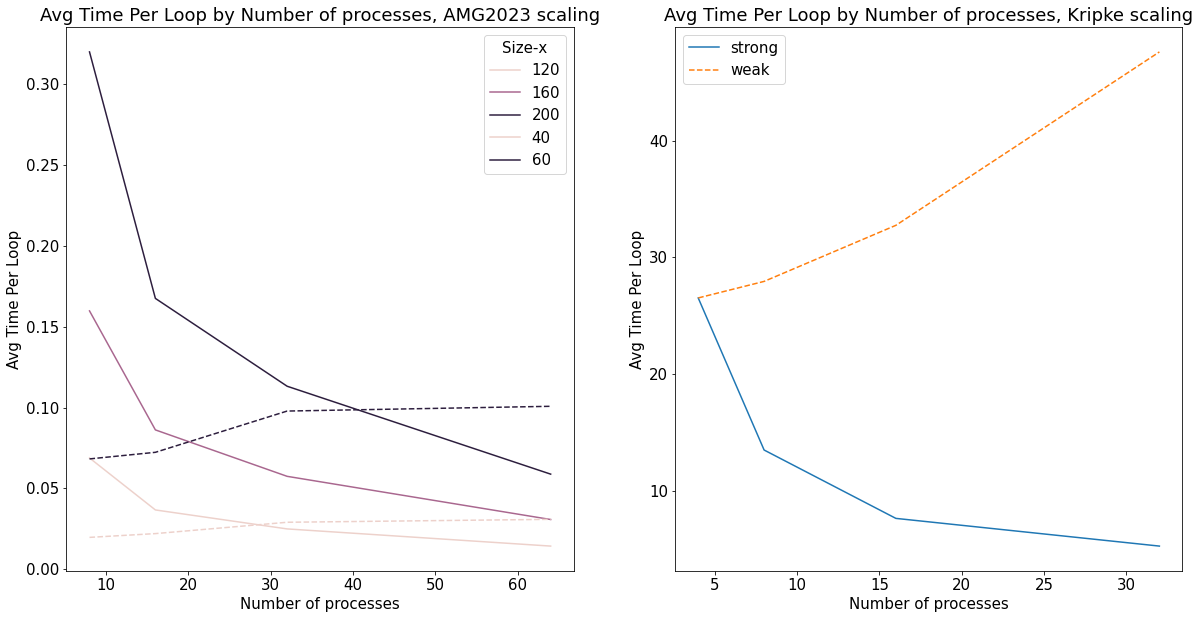

<Figure size 432x288 with 0 Axes>

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")
sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")

sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', label="strong")
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', linestyle="--", label="weak")

ax[0].set_title('Avg Time Per Loop by Number of processes, AMG2023 scaling')
ax[1].set_title('Avg Time Per Loop by Number of processes, Kripke scaling')
plt.xlabel('Number of processes')
plt.ylabel('Avg Time Per Loop')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')



# Display the plot
plt.show()
plt.savefig("Avg Time Per Loop.png")

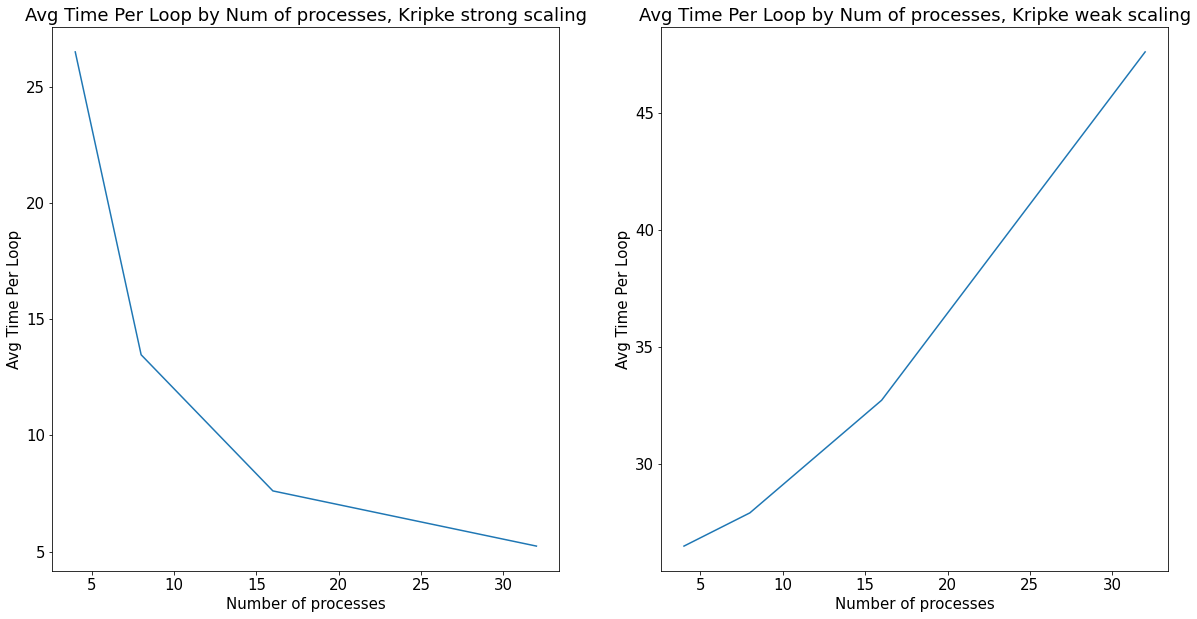

<Figure size 432x288 with 0 Axes>

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x", label="strong")
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x", label="weak")

sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Avg Time Per Loop')
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop')

ax[0].set_title('Avg Time Per Loop by Num of processes, Kripke strong scaling')
ax[1].set_title('Avg Time Per Loop by Num of processes, Kripke weak scaling')
plt.xlabel('Number of processes')
plt.ylabel('Avg Time Per Loop')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')



# Display the plot
plt.show()
plt.savefig("Avg Time Per Loop Kripke.png")

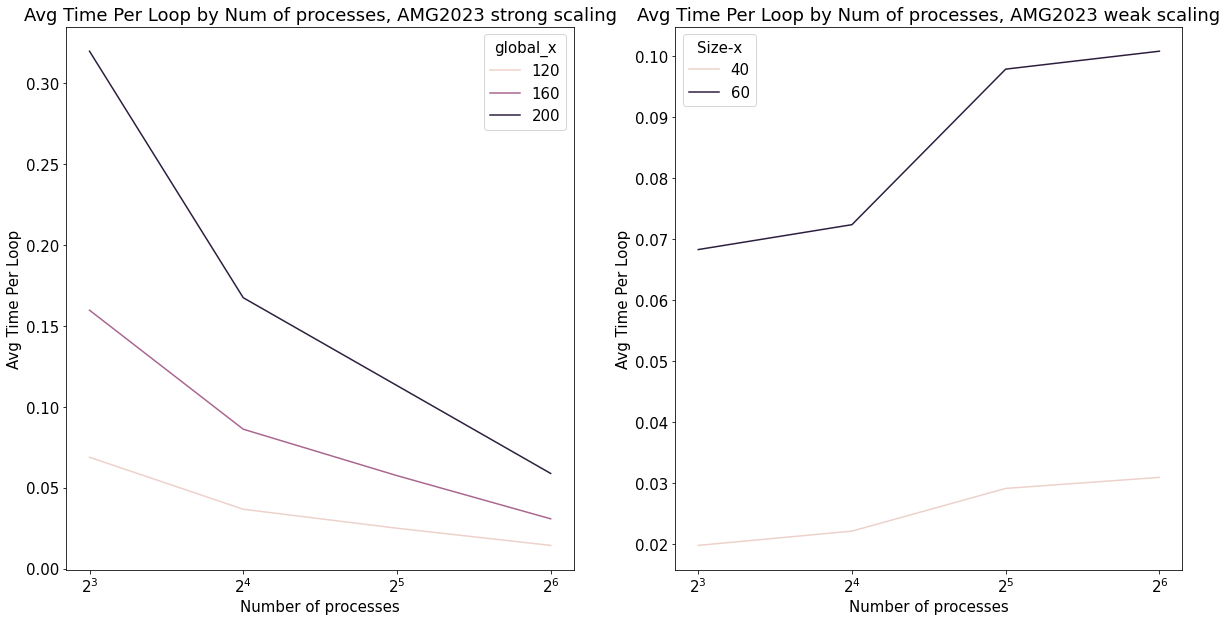

<Figure size 432x288 with 0 Axes>

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")

sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")
sns.lineplot(data=amg_node_weak, ax=ax[1], x='mpi.world.size', y='Avg Time Per Loop', hue="Size-x")

#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', label="strong")
#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Avg Time Per Loop', linestyle="--", label="weak")

ax[0].set_title('Avg Time Per Loop by Num of processes, AMG2023 strong scaling')
ax[1].set_title('Avg Time Per Loop by Num of processes, AMG2023 weak scaling')
plt.xlabel('Number of processes')
plt.ylabel('Avg Time Per Loop')
ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')



# Display the plot
plt.show()
plt.savefig("Avg Time Per Loop AMG.png")

# Plots for Src rank (max)

<Figure size 1440x720 with 0 Axes>

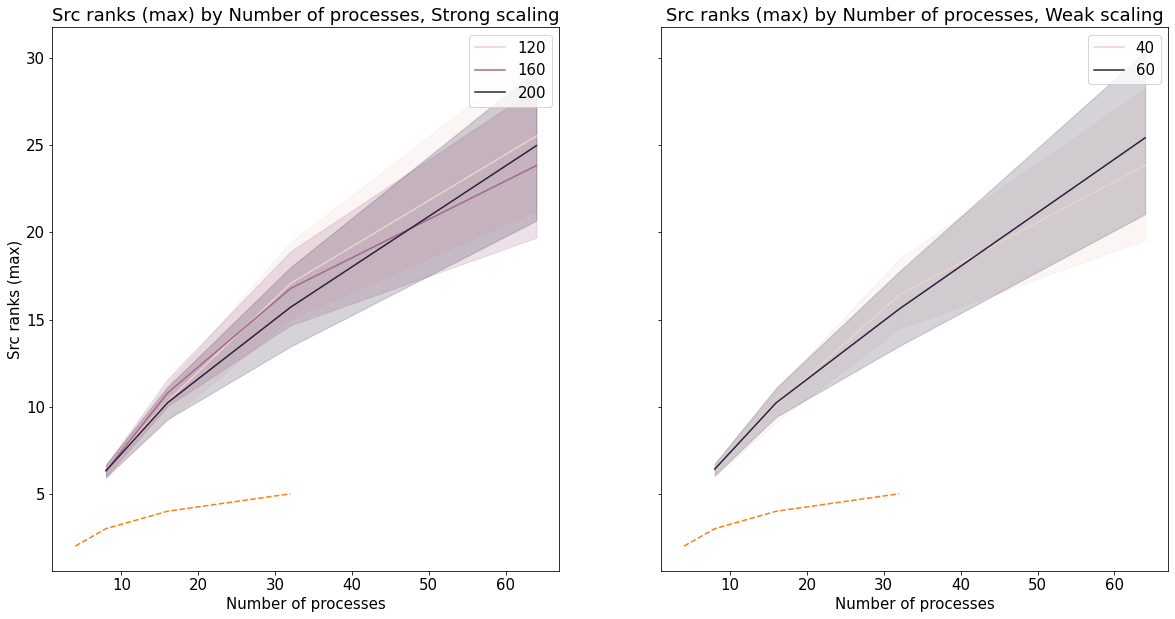

<Figure size 432x288 with 0 Axes>

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
plt.figure(figsize=(20, 10))

#df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
#df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=True)

sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', hue="global_x")
sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', linestyle="--")
sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1], y='Src ranks (max)', hue="Size-x")
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Src ranks (max)', linestyle="--")

#sns.lineplot(data=amg_node_weak, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', linestyle="--", hue="Size-x")
#sns.lineplot(data=amg_node_strong, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="global_x")


ax[0].set_title('Src ranks (max) by Number of processes, Strong scaling')
ax[1].set_title('Src ranks (max) by Number of processes, Weak scaling')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
plt.ylabel('Src ranks (max)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Src ranks AMG_Kripke.svg")

/tmp/ipykernel_208841/3801770963.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
/tmp/ipykernel_208841/3801770963.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)


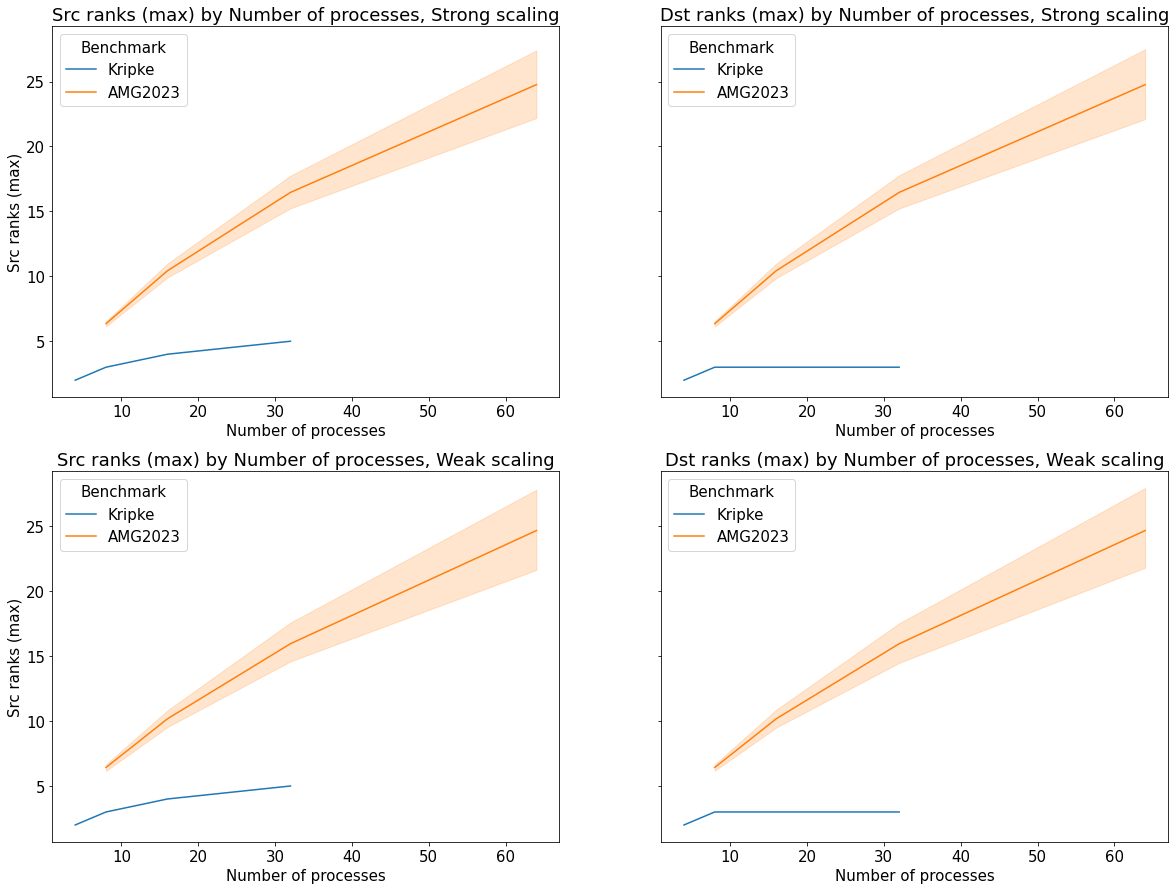

<Figure size 432x288 with 0 Axes>

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
#plt.figure(figsize=(20, 10))

df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(2,2, figsize=(20, 15), sharey=True)

sns.lineplot(data=df_strong, x='mpi.world.size', ax=ax[0,0], y='Src ranks (max)', hue="Benchmark")
#sns.lineplot(data=df_weak, x='mpi.world.size', ax=ax[0,1], y='Src ranks (max)', hue="Benchmark")
sns.lineplot(data=df_strong, x='mpi.world.size', ax=ax[0,1], y='Dst ranks (max)', hue="Benchmark")
#sns.lineplot(data=df_weak, x='mpi.world.size', ax=ax[1,1], y='Dst ranks (max)', hue="Benchmark")
sns.lineplot(data=df_weak, x='mpi.world.size', ax=ax[1,0], y='Src ranks (max)', hue="Benchmark")
sns.lineplot(data=df_weak, x='mpi.world.size', ax=ax[1,1], y='Dst ranks (max)', hue="Benchmark")

ax[0,0].set_title('Src ranks (max) by Number of processes, Strong scaling')
#ax[0, 1].set_title('Src ranks (max) by Number of processes, Weak scaling')
ax[0,1].set_title('Dst ranks (max) by Number of processes, Strong scaling')
ax[1, 0].set_title('Src ranks (max) by Number of processes, Weak scaling')
ax[1,1].set_title('Dst ranks (max) by Number of processes, Weak scaling')
ax[0,0].set_xlabel('Number of processes')
ax[0,1].set_xlabel('Number of processes')
ax[1,0].set_xlabel('Number of processes')
ax[1,1].set_xlabel('Number of processes')
plt.ylabel('Src ranks (max)')
#ax[0].set_xscale("log", base=2)
#ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Src_Dst_ranks AMG_Kripke.png")

# Plots for Bytes sent (max)

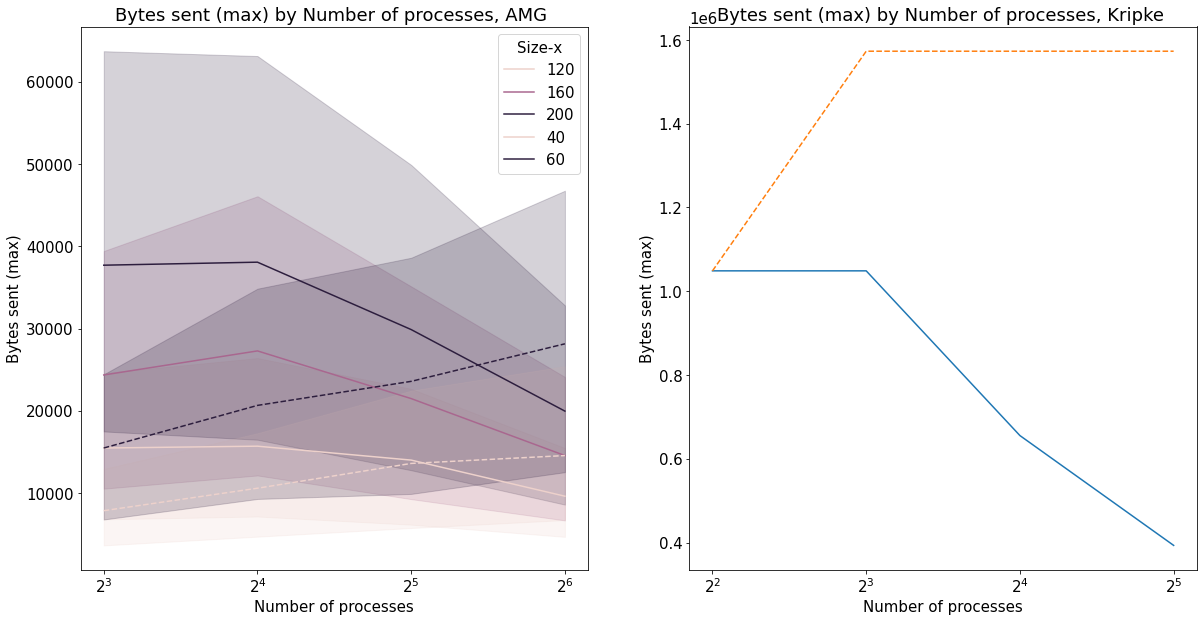

<Figure size 432x288 with 0 Axes>

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)

#sns.lineplot(data=df_amg, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="Scaling")
#sns.lineplot(data=df_kripke, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', hue="Scaling")

sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="global_x")
sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="Size-x", linestyle="--")
sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)')
sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', linestyle="--")


ax[0].set_title('Bytes sent (max) by Number of processes, AMG ')
ax[1].set_title('Bytes sent (max) by Number of processes, Kripke ')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
plt.ylabel('Bytes sent (max)')
ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Bytes sent (max) AMG_Kripke.svg")

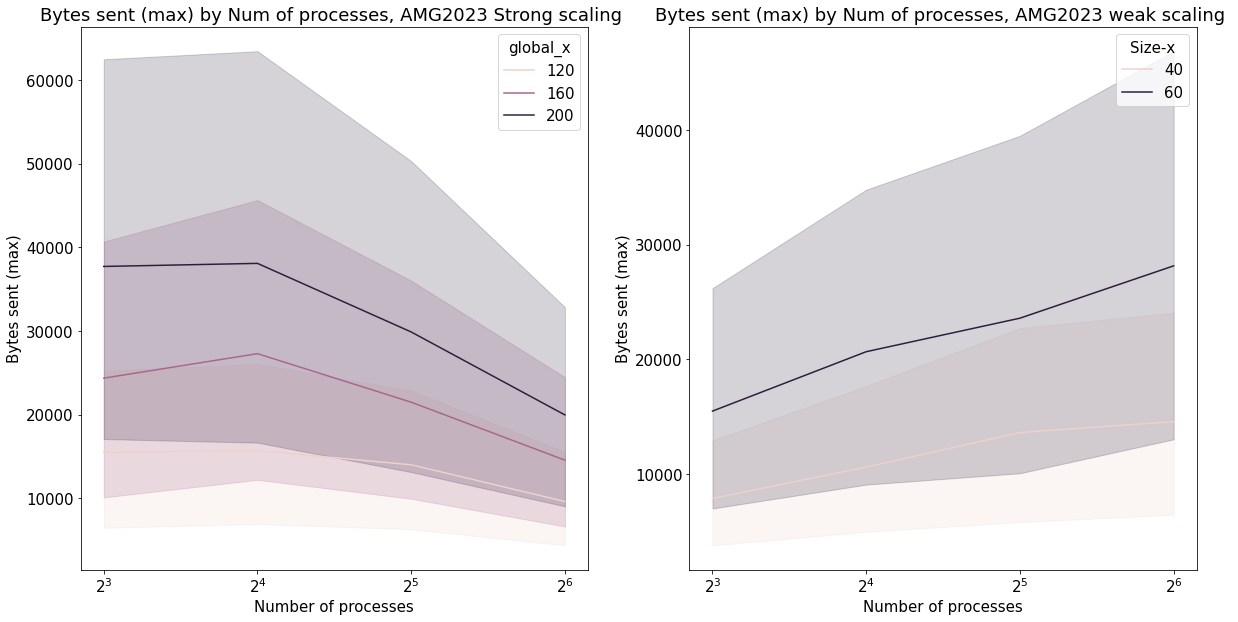

<Figure size 432x288 with 0 Axes>

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)

#df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
#df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)

#sns.lineplot(data=df_amg, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="Scaling")
#sns.lineplot(data=df_kripke, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', hue="Scaling")

sns.lineplot(data=amg_node_strong, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="global_x")
sns.lineplot(data=amg_node_weak, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', hue="Size-x")
#sns.lineplot(data=kripke_node_strong, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)')
#sns.lineplot(data=kripke_node_weak, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', linestyle="--")


ax[0].set_title('Bytes sent (max) by Num of processes, AMG2023 Strong scaling ')
ax[1].set_title('Bytes sent (max) by Num of processes, AMG2023 weak scaling ')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
plt.ylabel('Bytes sent (max)')
ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Bytes sent (max) AMG.svg")

# Plot for Dst ranks (max)

/tmp/ipykernel_3545092/546132545.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
/tmp/ipykernel_3545092/546132545.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)


<Figure size 1440x720 with 0 Axes>

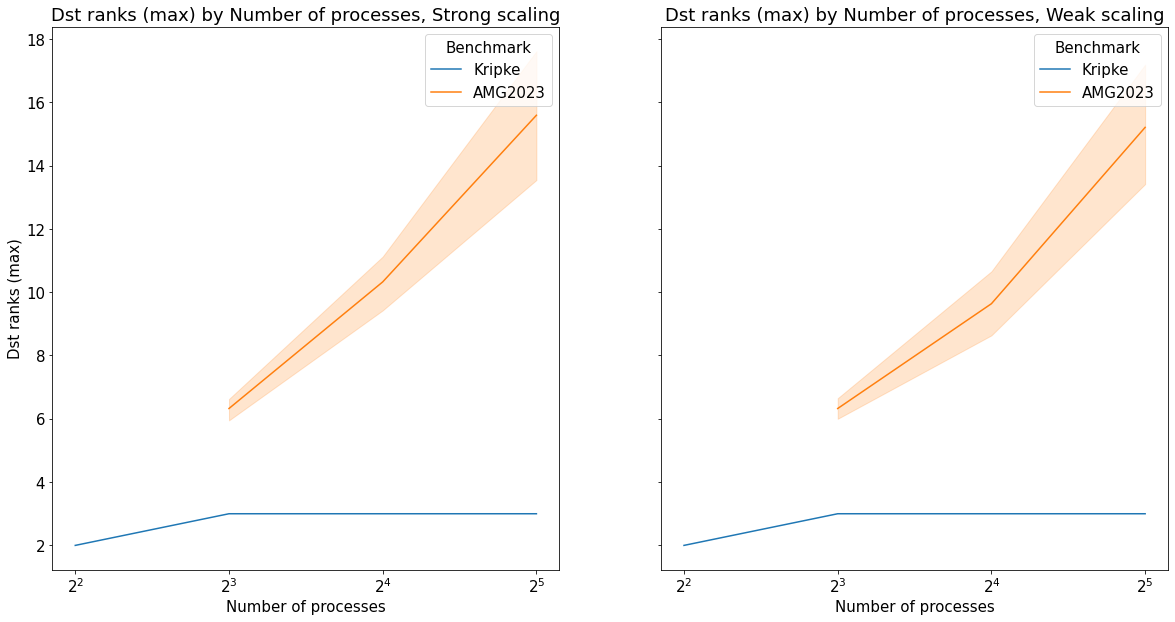

<Figure size 432x288 with 0 Axes>

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
plt.figure(figsize=(20, 10))

df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=True)

sns.lineplot(data=df_strong, x='mpi.world.size', ax=ax[0], y='Dst ranks (max)', hue="Benchmark")
sns.lineplot(data=df_weak, x='mpi.world.size', ax=ax[1], y='Dst ranks (max)', hue="Benchmark")


ax[0].set_title('Dst ranks (max) by Number of processes, Strong scaling')
ax[1].set_title('Dst ranks (max) by Number of processes, Weak scaling')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
plt.ylabel('Dst ranks (max)')
ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Dst ranks AMG_Kripke.svg")

In [119]:
# print(df_amg["Bytes sent (max)"])

# AMG2023 PROBLEM 2

# Avg time per loop

/tmp/ipykernel_3888681/2796400989.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
/tmp/ipykernel_3888681/2796400989.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)


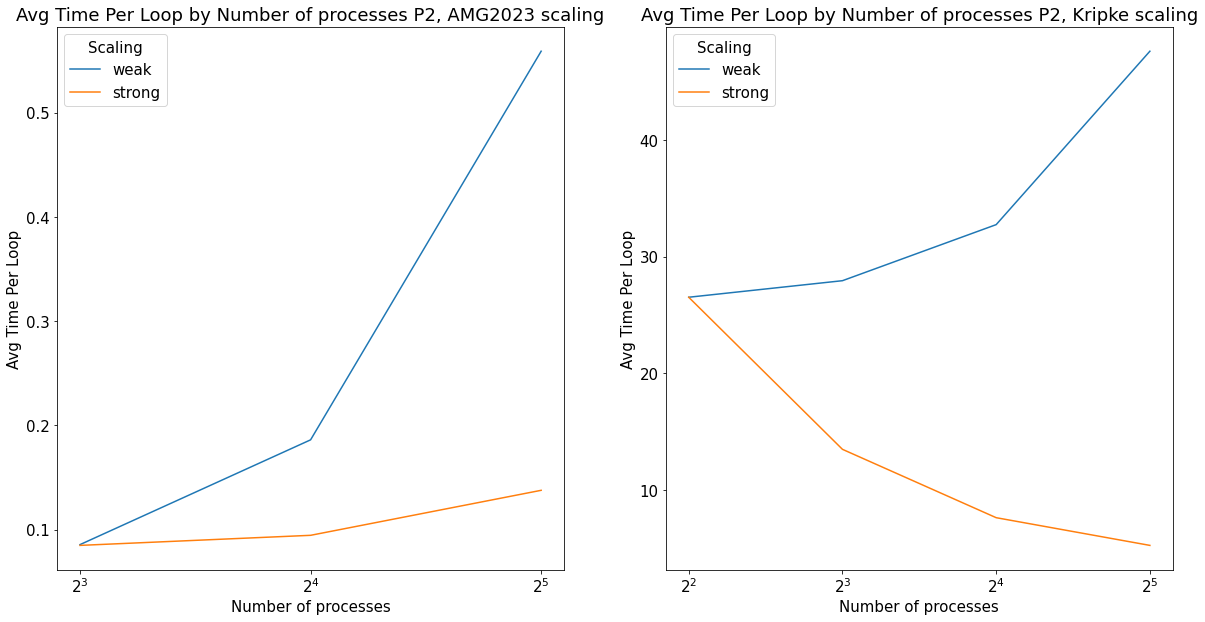

<Figure size 432x288 with 0 Axes>

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("hypre_BoomerAMGSolve")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("solve")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("hypre_BoomerAMGSolve")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("solve")]

df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)
#df_strong = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)
sns.lineplot(data=df_amg, ax=ax[0], x='mpi.world.size', y='Avg Time Per Loop', hue="Scaling")
sns.lineplot(data=df_kripke, ax=ax[1], x='mpi.world.size', y='Avg Time Per Loop', hue="Scaling")

ax[0].set_title('Avg Time Per Loop by Number of processes P2, AMG2023 scaling')
ax[1].set_title('Avg Time Per Loop by Number of processes P2, Kripke scaling')
plt.xlabel('Number of processes')
plt.ylabel('Avg Time Per Loop')
ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
# Display the plot
plt.show()
plt.savefig("Avg Time Per Loop_problem2.png")

# Src ranks

/tmp/ipykernel_3888681/301402833.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
/tmp/ipykernel_3888681/301402833.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)


<Figure size 1440x720 with 0 Axes>

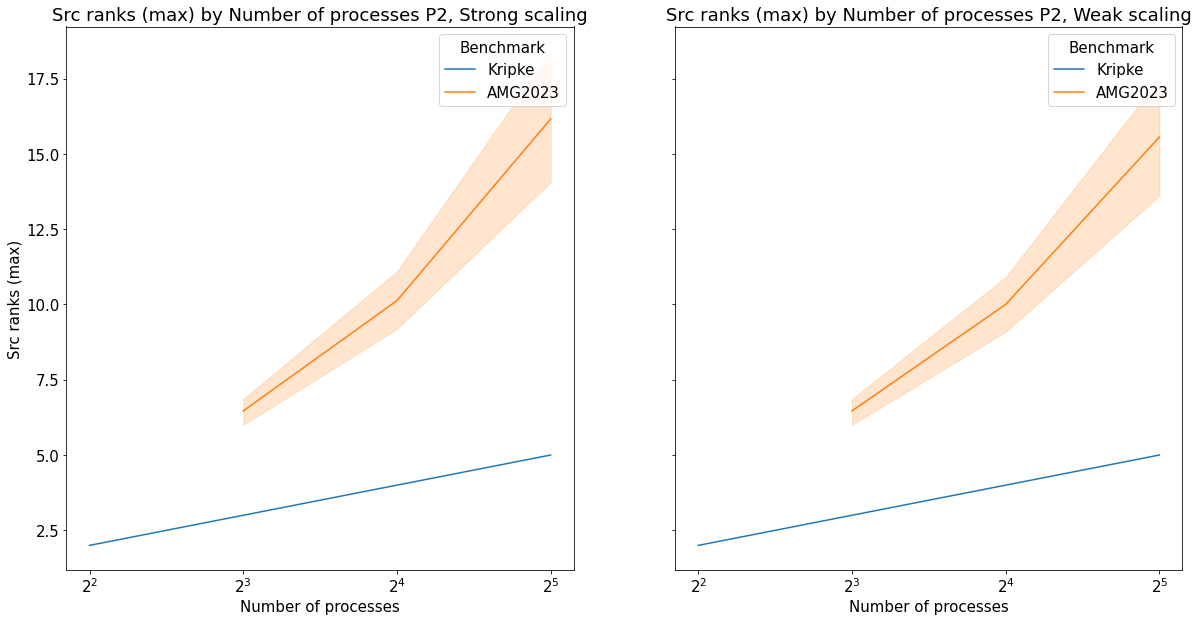

<Figure size 432x288 with 0 Axes>

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
plt.figure(figsize=(20, 10))

df_strong = kripke_node_strong.append(amg_node_strong, ignore_index=True)
df_weak = kripke_node_weak.append(amg_node_weak, ignore_index=True)

fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=True)

sns.lineplot(data=df_strong, x='mpi.world.size', ax=ax[0], y='Src ranks (max)', hue="Benchmark")
sns.lineplot(data=df_weak, x='mpi.world.size', ax=ax[1], y='Src ranks (max)', hue="Benchmark")


ax[0].set_title('Src ranks (max) by Number of processes P2, Strong scaling')
ax[1].set_title('Src ranks (max) by Number of processes P2, Weak scaling')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
plt.ylabel('Src ranks (max)')
ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Src ranks AMG_Kripke_P2.svg")

# Bytes sent max

/tmp/ipykernel_3888681/1299678053.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
/tmp/ipykernel_3888681/1299678053.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)


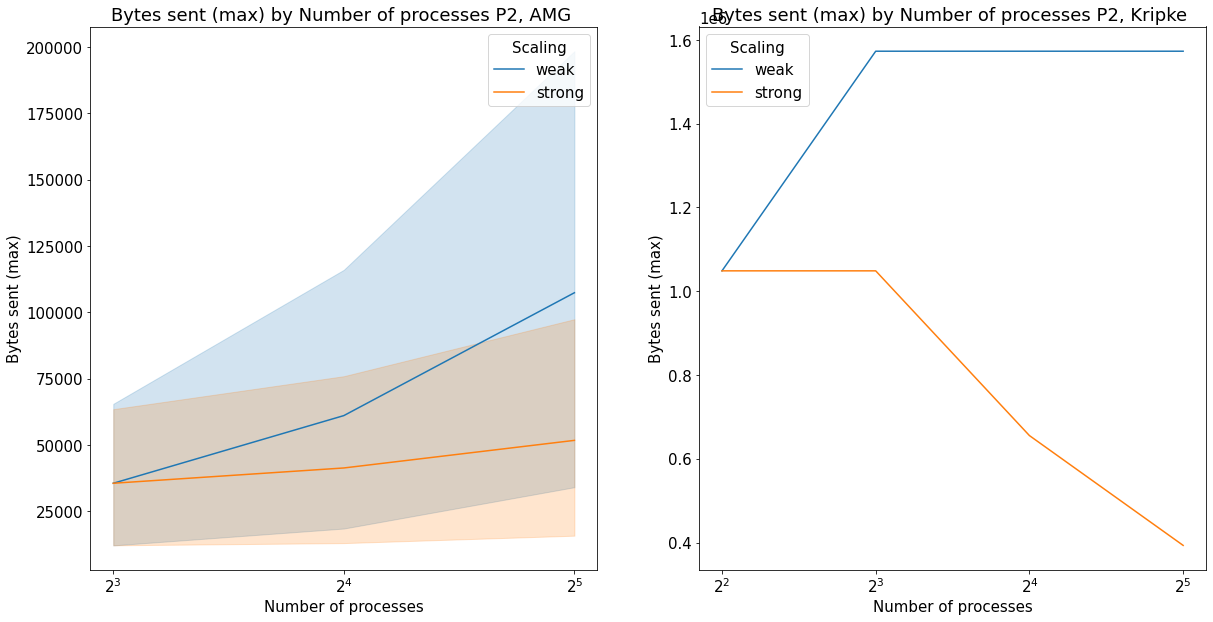

<Figure size 432x288 with 0 Axes>

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

amg_node_weak = filtered_tk_amg_halo_weak.dataframe.loc[filtered_tk_amg_halo_weak.get_node("halo_exchange")]
kripke_node_weak = filtered_tk_kripke_weak.dataframe.loc[filtered_tk_kripke_weak.get_node("halo_exchange")]

amg_node_strong = filtered_tk_amg_halo.dataframe.loc[filtered_tk_amg_halo.get_node("halo_exchange")]
kripke_node_strong = filtered_tk_kripke.dataframe.loc[filtered_tk_kripke.get_node("halo_exchange")]
fig, ax = plt.subplots(1,2, figsize=(20, 10), sharey=False)

df_amg = amg_node_weak.append(amg_node_strong, ignore_index=True)
df_kripke = kripke_node_weak.append(kripke_node_strong, ignore_index=True)

sns.lineplot(data=df_amg, x='mpi.world.size', ax=ax[0], y='Bytes sent (max)', hue="Scaling")
sns.lineplot(data=df_kripke, x='mpi.world.size', ax=ax[1], y='Bytes sent (max)', hue="Scaling")


ax[0].set_title('Bytes sent (max) by Number of processes P2, AMG ')
ax[1].set_title('Bytes sent (max) by Number of processes P2, Kripke ')
ax[0].set_xlabel('Number of processes')
ax[1].set_xlabel('Number of processes')
plt.ylabel('Bytes sent (max)')
ax[0].set_xscale("log", base=2)
ax[1].set_xscale("log", base=2)

# Display the plot
plt.show()
plt.savefig("Bytes sent (max) AMG_KripkeP2.svg")

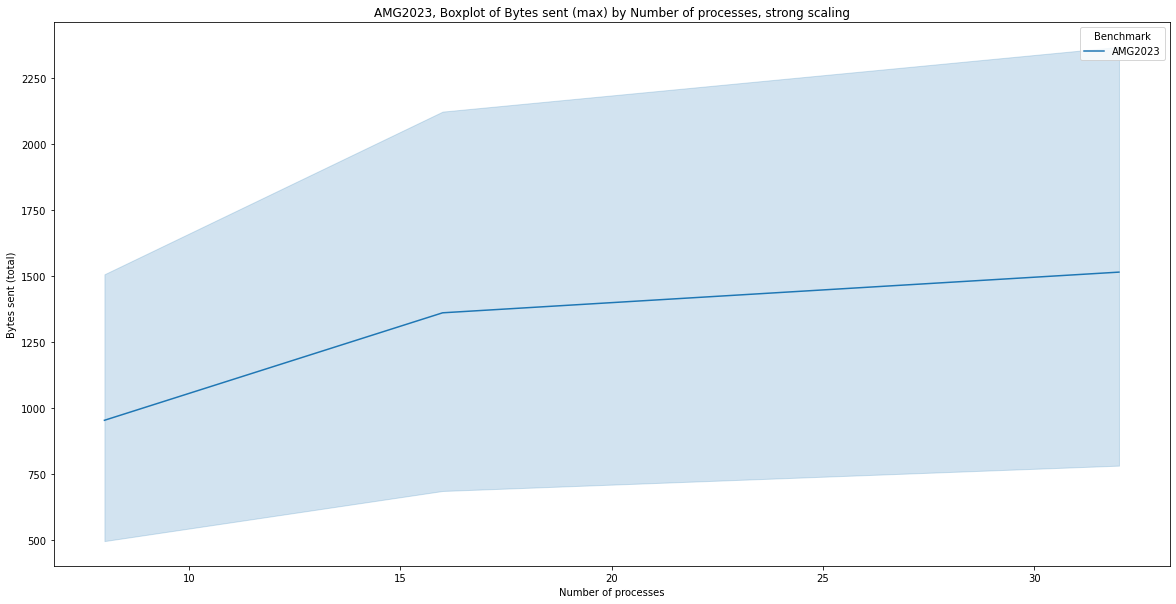

<Figure size 432x288 with 0 Axes>

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

#df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)

sns.lineplot(data=filtered_tk_amg_halo.dataframe, x='mpi.world.size', y='Bytes sent (max)', hue="Benchmark")

plt.title('AMG2023, Boxplot of Bytes sent (max) by Number of processes, strong scaling')
plt.xlabel('Number of processes')
plt.ylabel('Bytes sent (total)')

# Display the plot
plt.show()
plt.savefig("Bytes sent (total)_strong.svg")

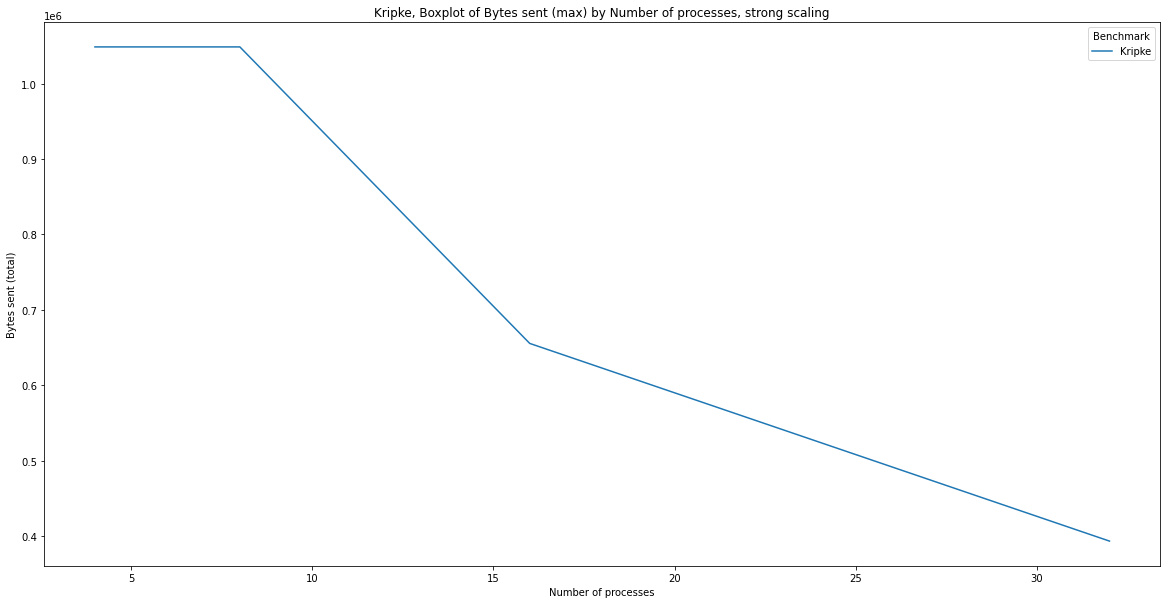

<Figure size 432x288 with 0 Axes>

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

#df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)

sns.lineplot(data=filtered_tk_kripke.dataframe, x='mpi.world.size', y='Bytes sent (max)', hue="Benchmark")

plt.title('Kripke, Boxplot of Bytes sent (max) by Number of processes, strong scaling')
plt.xlabel('Number of processes')
plt.ylabel('Bytes sent (total)')

# Display the plot
plt.show()
plt.savefig("Bytes sent (total)_strong_kripke.svg")

# plot graphs for strong scaling 

/tmp/ipykernel_164869/2403794037.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)


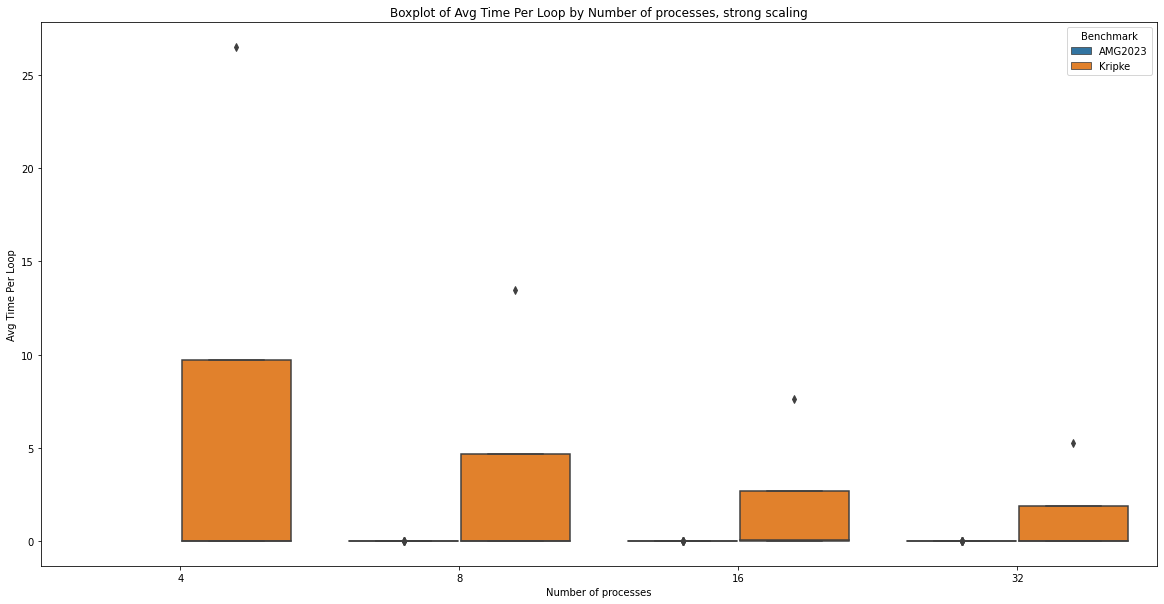

<Figure size 432x288 with 0 Axes>

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
#print(df)
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='mpi.world.size', y='Avg Time Per Loop', hue="Benchmark")

plt.title('Boxplot of Avg Time Per Loop by Number of processes, strong scaling')
plt.xlabel('Number of processes')
plt.ylabel('Avg Time Per Loop')

# Display the plot
plt.show()
plt.savefig("Avg Time Per Loop_strong.svg")

/tmp/ipykernel_164869/1726889839.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)


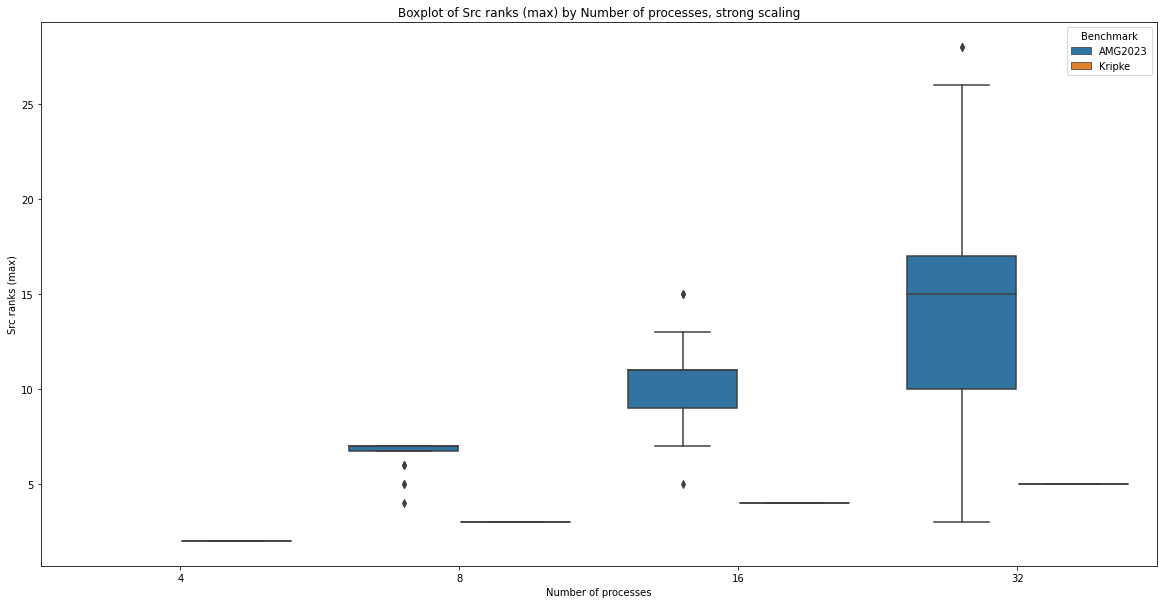

<Figure size 432x288 with 0 Axes>

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
sns.boxplot(data=df, x='mpi.world.size', y='Src ranks (max)', hue="Benchmark")

plt.title('Boxplot of Src ranks (max) by Number of processes, strong scaling')
plt.xlabel('Number of processes')
plt.ylabel('Src ranks (max)')

# Display the plot
plt.show()
plt.savefig("Src ranks_strong.svg")

/tmp/ipykernel_164869/3525096349.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)


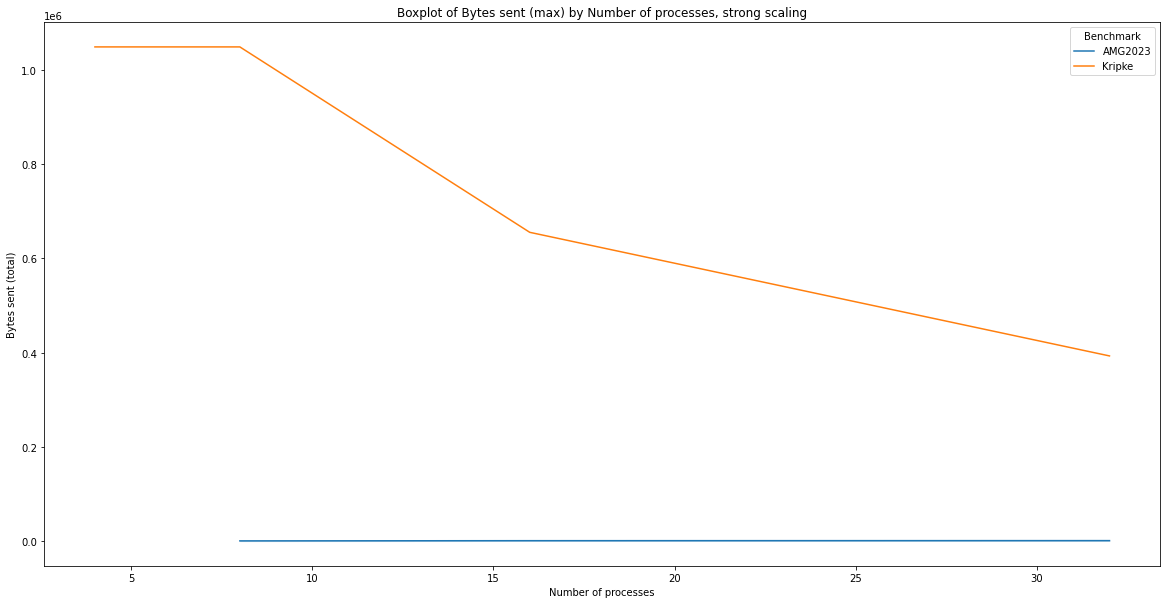

<Figure size 432x288 with 0 Axes>

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

df = filtered_tk_amg_halo.dataframe.append(filtered_tk_kripke.dataframe, ignore_index=True)
sns.lineplot(data=df, x='mpi.world.size', y='Bytes sent (max)', hue="Benchmark")

plt.title('Boxplot of Bytes sent (max) by Number of processes, strong scaling')
plt.xlabel('Number of processes')
plt.ylabel('Bytes sent (total)')

# Display the plot
plt.show()
plt.savefig("Bytes sent (total)_strong.svg")